<a href="https://colab.research.google.com/github/AnujaTheophilus/Newrepo/blob/main/DataAquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [14]:
df = pd.read_csv('/content/Real_Estate.csv')
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


 What is the size of the dataset? (Number of rows and columns)



In [15]:
df.shape

(414, 7)

 What are the data types of each column?


In [16]:
df.dtypes

Transaction date                        object
House age                              float64
Distance to the nearest MRT station    float64
Number of convenience stores             int64
Latitude                               float64
Longitude                              float64
House price of unit area               float64
dtype: object

Are there any missing values in the dataset? If so, which columns have
missing values and how many?


In [17]:
df.isna().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

What are the unique values in a categorical column of your choice? How many unique values are there?


In [18]:
df.nunique()

Transaction date                       414
House age                              178
Distance to the nearest MRT station    183
Number of convenience stores            11
Latitude                               414
Longitude                              414
House price of unit area               384
dtype: int64

 For a numerical column of your choice, calculate the mean, median, and
standard deviation.

In [19]:
df['Latitude'].agg(['mean','median'])

mean      24.973605
median    24.974353
Name: Latitude, dtype: float64

 Identify any potential outliers in a numerical column of your choice. Explain your approach.


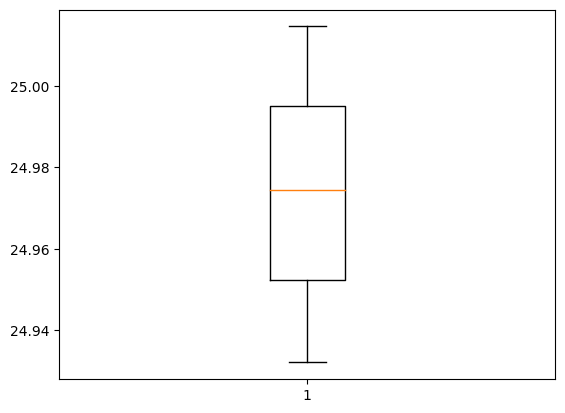

In [20]:
plt.boxplot(df['Latitude'])
plt.show()

Find the correlation between numerical columns and discuss any interesting relationships.


In [21]:
dff = df.select_dtypes(include=['int64','float64'])
dff

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,35.5,274.01440,2,25.012148,121.546990,24.970725
2,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798,29.096310
410,11.9,323.69120,2,24.950070,121.483918,33.871347
411,0.0,451.64190,8,24.963901,121.543387,25.255105
412,35.9,292.99780,5,24.997863,121.558286,25.285620


In [22]:
corr_matrix = dff.corr()
corr_matrix

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
House age,1.000000,0.021596,0.021973,0.114345,0.036449,-0.012284
Distance to the nearest MRT station,0.021596,1.000000,0.069015,0.038954,0.064229,-0.636579
Number of convenience stores,0.021973,0.069015,1.000000,0.082725,0.013156,0.280763
Latitude,0.114345,0.038954,0.082725,1.000000,0.007754,0.081008
Longitude,0.036449,0.064229,0.013156,0.007754,1.000000,-0.098626
House price of unit area,-0.012284,-0.636579,0.280763,0.081008,-0.098626,1.000000


 Group the data by a categorical column and compute the aggregate statistics(e.g., mean, sum) for a numerical column.

In [23]:
df.groupby('House age')['House price of unit area'].agg(['mean','sum'])

,mean,sum
House age,,
0.0,28.002816,616.061959
1.1,31.820420,254.563361
1.5,22.434001,44.868003
2.0,21.635534,64.906603
2.1,26.245414,26.245414
...,...,...
39.8,31.701993,95.105980
40.1,19.285138,19.285138
40.9,23.480699,187.845591


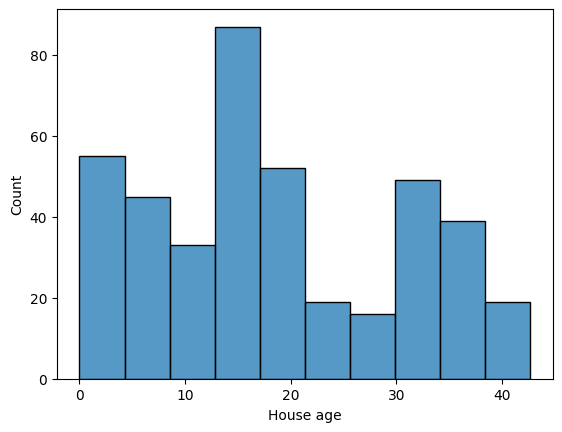

In [25]:
sns.histplot(df['House age'])
plt.show()

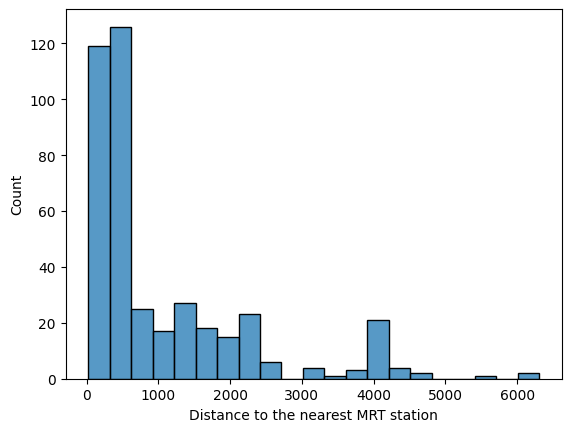

In [26]:
sns.histplot(df['Distance to the nearest MRT station'])
plt.show()

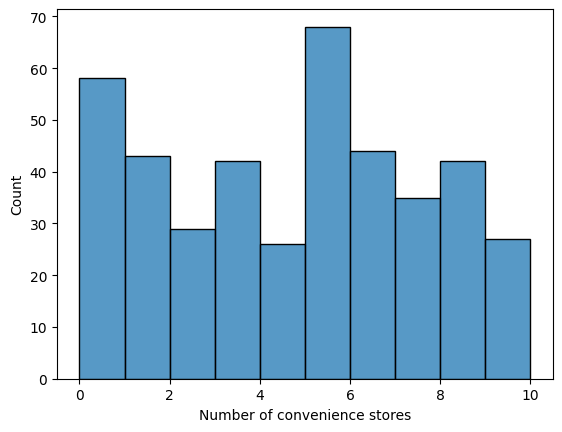

In [27]:
sns.histplot(df['Number of convenience stores'])
plt.show()

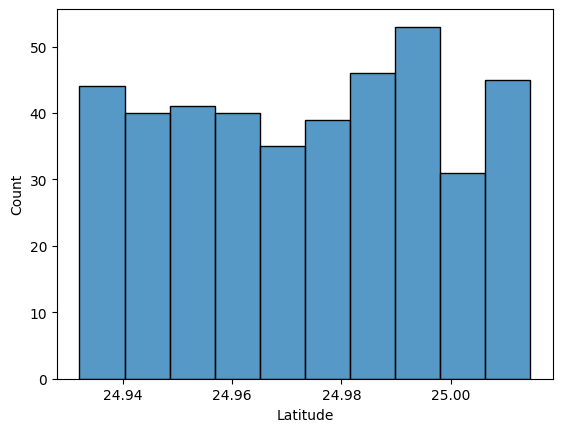

In [28]:
sns.histplot(df['Latitude'])
plt.show()